 # Bike Sharing

> **Background Information**

>> Bike sharing systems are the new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

> **Research Interest**
>> Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

> **Attribute Information**

>> - instant: record index 
- dteday : date 
- season : season (1:winter, 2:spring, 3:summer, 4:fall) 
- yr : year (0: 2011, 1:2012) 
- mnth : month ( 1 to 12) 
- hr : hour (0 to 23) 
- holiday : weather day is holiday or not 
- weekday : day of the week 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. 
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) 
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 
- hum: Normalized humidity. The values are divided to 100 (max) 
- windspeed: Normalized wind speed. The values are divided to 67 (max) 
- casual: count of casual users 
- registered: count of registered users 
>> - cnt: count of total rental bikes including both casual and registered 

In [1]:
# Imports

import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
# Get Rid of Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
day = pd.read_csv('day.csv')

In [4]:
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
day.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [6]:
hour = pd.read_csv('hour.csv')

In [7]:
hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [8]:
hour.tail()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

> ### **Hypothesis Generation**
   - Daily Trend: Registered users demand more bike on weekdays as compared to weekend or holiday.
   - Rain: The demand of bikes will be lower on a rainy day as compared to a sunny day. Similarly, higher humidity will cause to lower the demand and vice versa.

# ******************
# Day Dataset
# ******************

In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### As we see in the info, the data type of *season*, *holiday*, *workingday*, *weekday* and *weathersit* is integer, although they are categorical columns in our dataset. Hence, we need to change their data types before we can start the EDA process.

In [10]:
categoryVariableList = ['weekday','season','weathersit','holiday','workingday']
for var in categoryVariableList:
    day[var] = day[var].astype("category")

In [11]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    int64   
 4   mnth        731 non-null    int64   
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(5), float64(4), int64(6), object(1)
memory usage: 67.4+ KB


In [12]:
# Dropping unnecessary column

day.drop(["instant"], axis = 1, inplace = True)

In [13]:
day.head()

dteday season  yr  mnth holiday weekday workingday weathersit  \
0  2011-01-01      1   0     1       0       6          0          2   
1  2011-01-02      1   0     1       0       0          0          2   
2  2011-01-03      1   0     1       0       1          1          1   
3  2011-01-04      1   0     1       0       2          1          1   
4  2011-01-05      1   0     1       0       3          1          1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600

In [14]:
day.shape

(731, 15)

In [15]:
day.describe()

yr        mnth        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.500684    6.519836    0.495385    0.474354    0.627894    0.190486   
std      0.500342    3.451913    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    4.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    7.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000   10.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000   12.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

   - **average of temperature** is 49 celcius
   - **average of feeling temperature** is 47 celcius
   - **average humidity** is 62
   - **average windspeed** is 19

In [16]:
# Getting rid of duplicates

day = day.drop_duplicates()
day.duplicated().sum()

0

In [17]:
# What are our headers in the dataset?

header_day = day.dtypes.index
print(header_day)

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [18]:
day.dtypes.value_counts()

int64       5
float64     4
category    2
category    1
category    1
object      1
category    1
dtype: int64

#### We want to find out whether we have any missing values in our data. Luckily we do not have any missing values in the dataset.
#### One way I prefer to visualize missing value in the dataset is through "missingno".

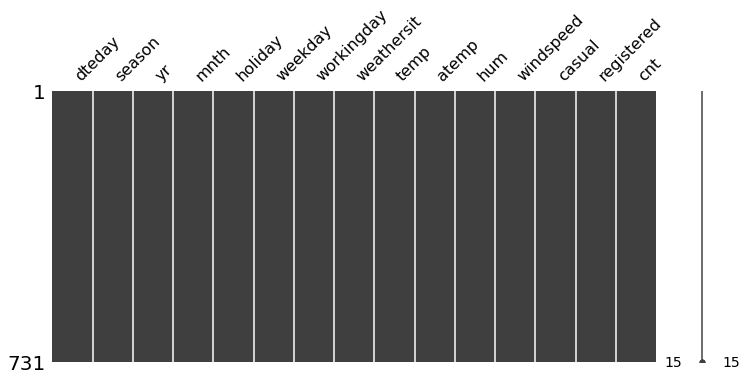

In [19]:
# Skewness In Distribution

msno.matrix(day,figsize=(12,5))

#### Now, we are going to look into the box plots on variables to check for outliers:

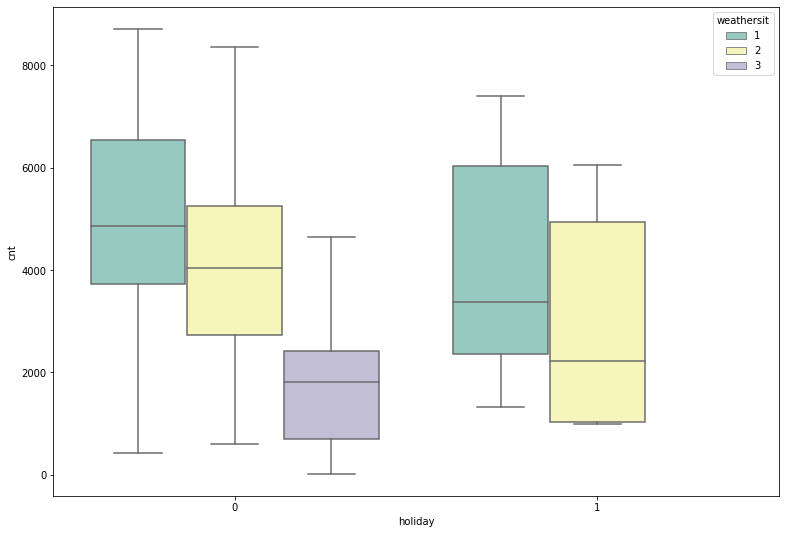

In [20]:
# Box Plot on Count and Weather Situation

plt.subplots(figsize=(13,9))
sns.boxplot(x='holiday',hue='weathersit', y='cnt',data=day, palette="Set3")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day or not'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

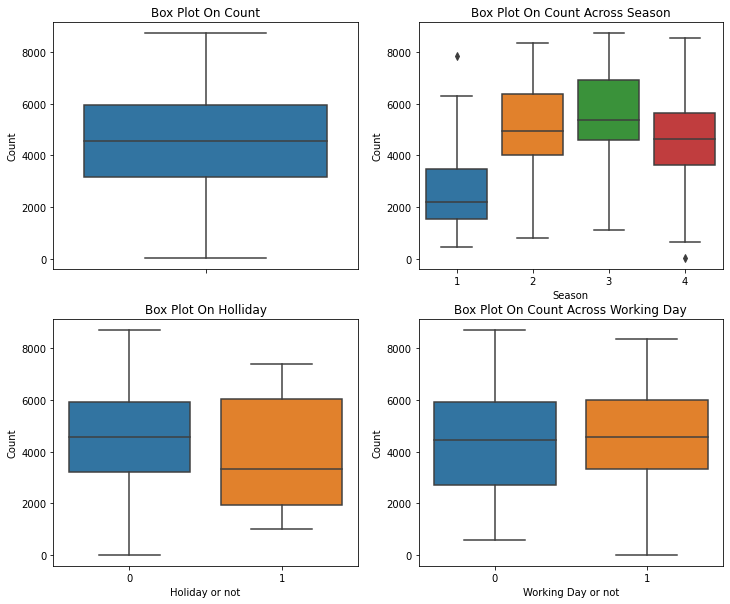

In [21]:
# Box Plot on Count, Season, Holiday, Working Day

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

sns.boxplot(data=day,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=day,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=day,y="cnt",x="holiday",orient="v",ax=axes[1][0])
sns.boxplot(data=day,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Holiday or not', ylabel='Count',title="Box Plot On Holliday")
axes[1][1].set(xlabel='Working Day or not', ylabel='Count',title="Box Plot On Count Across Working Day")

#### Fortunately, our dataset does not have outliers which can bias our analysis in future steps.


### Correlation Analysis
#### A common way to understand how a *dependent variable* is influenced by *features* (numerical) is to look at a correlation matrix between them.

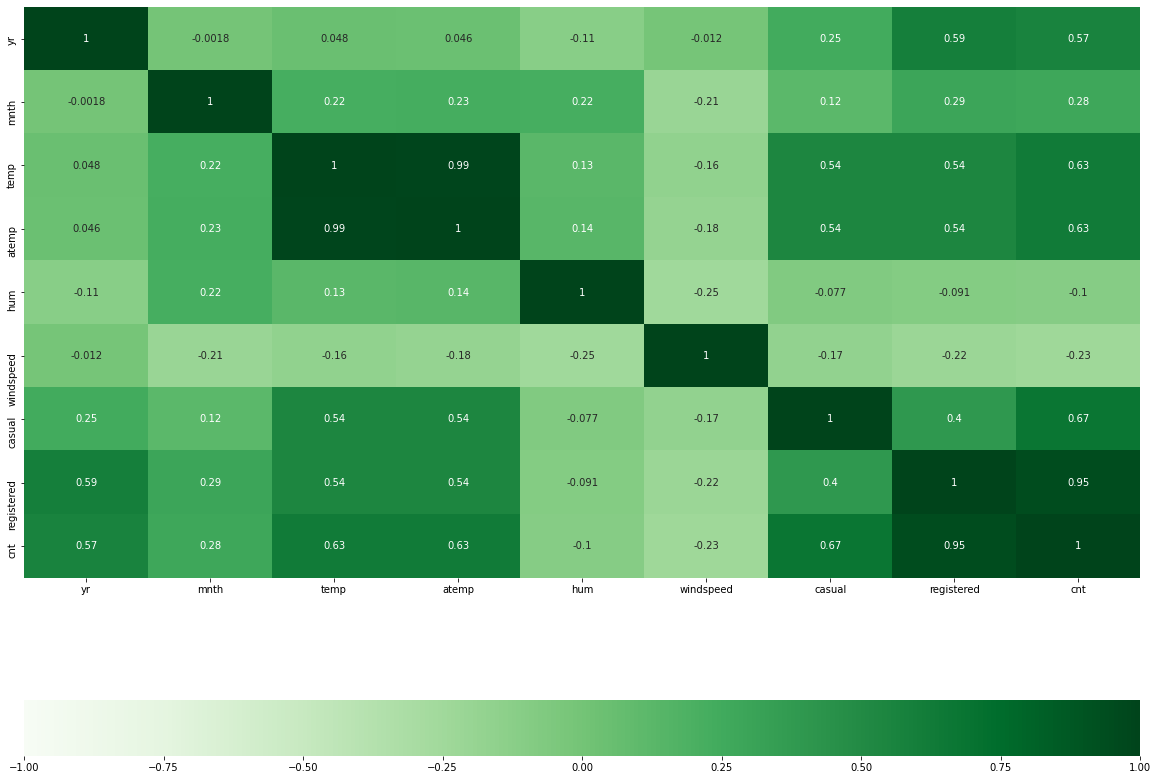

In [22]:
# Correlation

plt.subplots(figsize=(20,15))
sns.heatmap(day.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'Greens', cbar_kws= {'orientation': 'horizontal'})


**Looking at the correlation plot above and in order to avoind multicoliniarity, we do not want to put these features with each other in our modeling:**

- season & month
- temp & atemp
- registered & cnt

**Inferences from the Correlation Heatmap:**

- self relation of a feature to itself is equal to 1 as expected.

- temp and atemp are highly related as expected.

- humidity is inversely related to count as expected: meaning as the weather gets more humid, people will not like to travel on a bike.

- casual and working day are highly inversely related as you would expect.

- count and holiday are highly inversely related as you would expect.

- temp and/or atemp highly effect the count.

- weather and count are highly inversely related. This is because in our data as weather# increases from (1 to 4) implies that weather is getting worse, so people will rent less bikes.

- registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

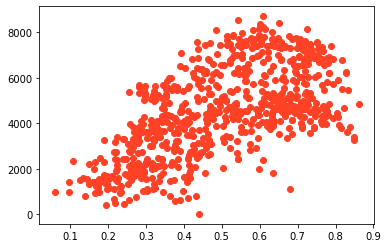

In [23]:
# for temp

fig.set_size_inches(12, 10)
plt.scatter(x="temp",y="cnt",data=day,color='#ff4125')

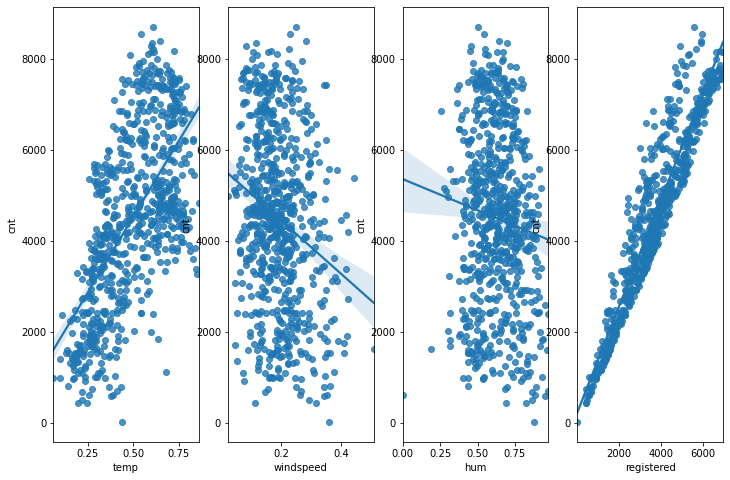

In [24]:
# Scatter Plot with Regression line

fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(12, 8)
sns.regplot(x="temp", y="cnt", data=day,ax=ax1)
sns.regplot(x="windspeed", y="cnt", data=day,ax=ax2)
sns.regplot(x="hum", y="cnt", data=day,ax=ax3)
sns.regplot(x="registered", y="cnt", data=day,ax=ax4)

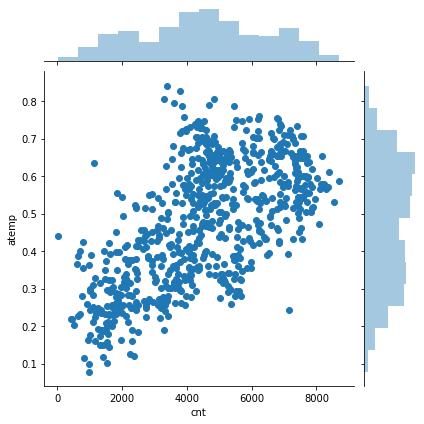

In [25]:
# Joint Plot of Count and Feeling Temparature

fig.set_size_inches(12, 10)
sns.jointplot(x='cnt', y="atemp", data=day)

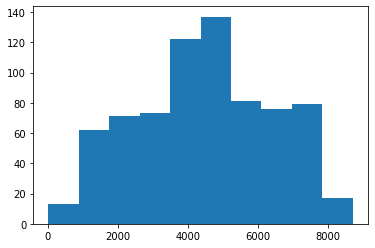

In [26]:
# Univariate Analysis of "Count" -> Almost a bell-shape, normal distribution

plt.hist(day['cnt']);

In [27]:
# Change "dteday" to a datetime value type

day['dteday'] = pd.to_datetime(day['dteday'])

In [28]:
# Extracting "Year" from datetime(dteday)

day['year'] = day['dteday'].dt.year
day.head()

dteday season  yr  mnth holiday weekday workingday weathersit      temp  \
0 2011-01-01      1   0     1       0       6          0          2  0.344167   
1 2011-01-02      1   0     1       0       0          0          2  0.363478   
2 2011-01-03      1   0     1       0       1          1          1  0.196364   
3 2011-01-04      1   0     1       0       2          1          1  0.200000   
4 2011-01-05      1   0     1       0       3          1          1  0.226957   

      atemp       hum  windspeed  casual  registered   cnt  year  
0  0.363625  0.805833   0.160446     331         654   985  2011  
1  0.353739  0.696087   0.248539     131         670   801  2011  
2  0.189405  0.437273   0.248309     120        1229  1349  2011  
3  0.212122  0.590435   0.160296     108        1454  1562  2011  
4  0.229270  0.436957   0.186900      82        1518  1600  2011

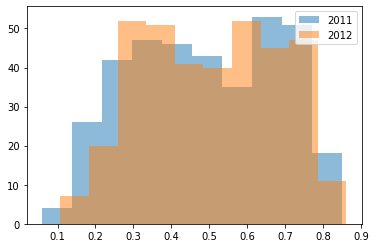

In [29]:
# Temperature Histogram: Comparing 2011 & 2012

plt.hist(day['temp'][day['year'] == 2011], alpha=0.5, label='2011')
plt.hist(day['temp'][day['year'] == 2012], alpha=0.5, label='2012')

plt.legend(loc='upper right');

In [30]:
# Extracting "Month" from datetime(dteday)

day['month'] = day['dteday'].dt.month
day.head()

dteday season  yr  mnth holiday weekday workingday weathersit      temp  \
0 2011-01-01      1   0     1       0       6          0          2  0.344167   
1 2011-01-02      1   0     1       0       0          0          2  0.363478   
2 2011-01-03      1   0     1       0       1          1          1  0.196364   
3 2011-01-04      1   0     1       0       2          1          1  0.200000   
4 2011-01-05      1   0     1       0       3          1          1  0.226957   

      atemp       hum  windspeed  casual  registered   cnt  year  month  
0  0.363625  0.805833   0.160446     331         654   985  2011      1  
1  0.353739  0.696087   0.248539     131         670   801  2011      1  
2  0.189405  0.437273   0.248309     120        1229  1349  2011      1  
3  0.212122  0.590435   0.160296     108        1454  1562  2011      1  
4  0.229270  0.436957   0.186900      82        1518  1600  2011      1

(array([119.,  62.,  60.,  62.,  60.,  62.,  62.,  60.,  62., 122.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

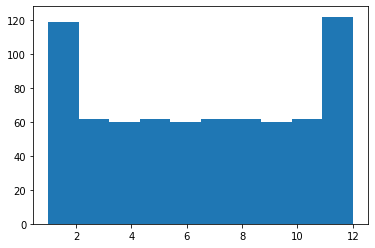

In [31]:
# Distribution of Months

plt.hist(day['month'])

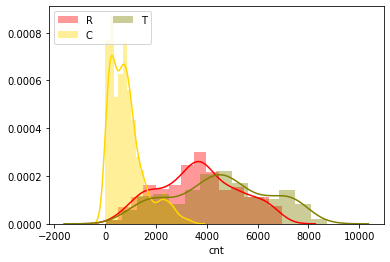

In [32]:
# Distribution Plot of Count, Registered, and Casual

fig.set_size_inches(10, 5)
sns.distplot( day["registered"] , color="red")
sns.distplot( day["casual"] , color="gold")
sns.distplot( day["cnt"] , color="olive")
plt.legend('RCT', ncol=2, loc='upper left');
plt.show()

#### As we see above, the distribution of *casual* users of bikes is highly skewed to the right while the distribution for *Total Count* and *Registered* users is almost a *normal distribution*.

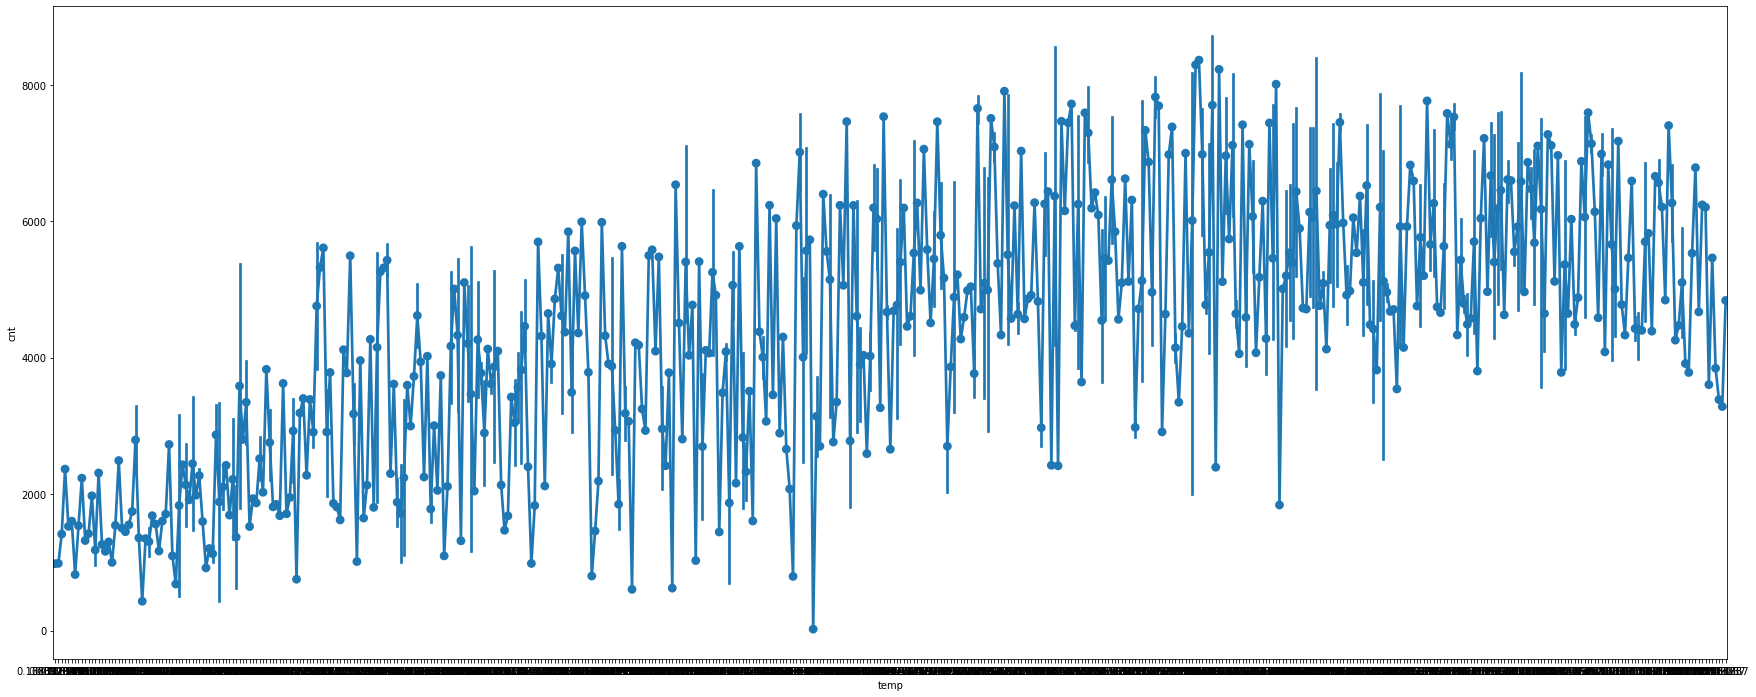

In [33]:
# Multivariate Analysis: Count/Temp

sns.pointplot(x=day['temp'], y=day['cnt'])
fig = plt.gcf()
fig.set_size_inches(30,12);

In [34]:
# R Squared: Count & Temp

from scipy import stats
_, _, r_value, _, _ = stats.linregress(day['cnt'], day['temp'])
r_square = r_value ** 2
r_square.round(2)

0.39

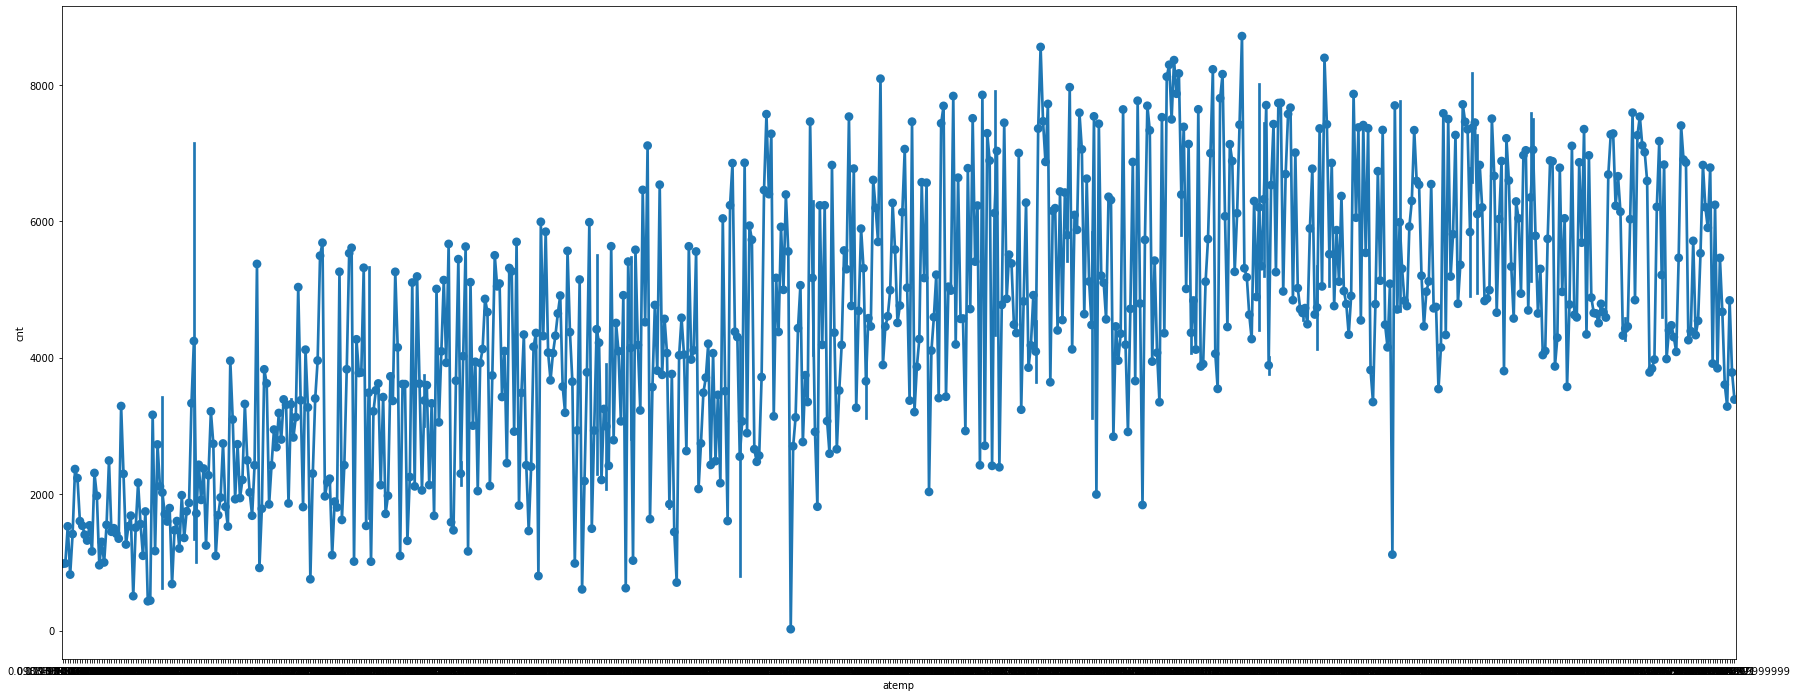

In [35]:
# Multivariate Analysis: Count/ATemp

sns.pointplot(x=day['atemp'], y=day['cnt'])
fig = plt.gcf()
fig.set_size_inches(30,12);

In [36]:
# R Squared: Count & ATemp

_, _, r_value, _, _ = stats.linregress(day['cnt'], day['atemp'])
r_square = r_value ** 2
r_square.round(2)

0.4

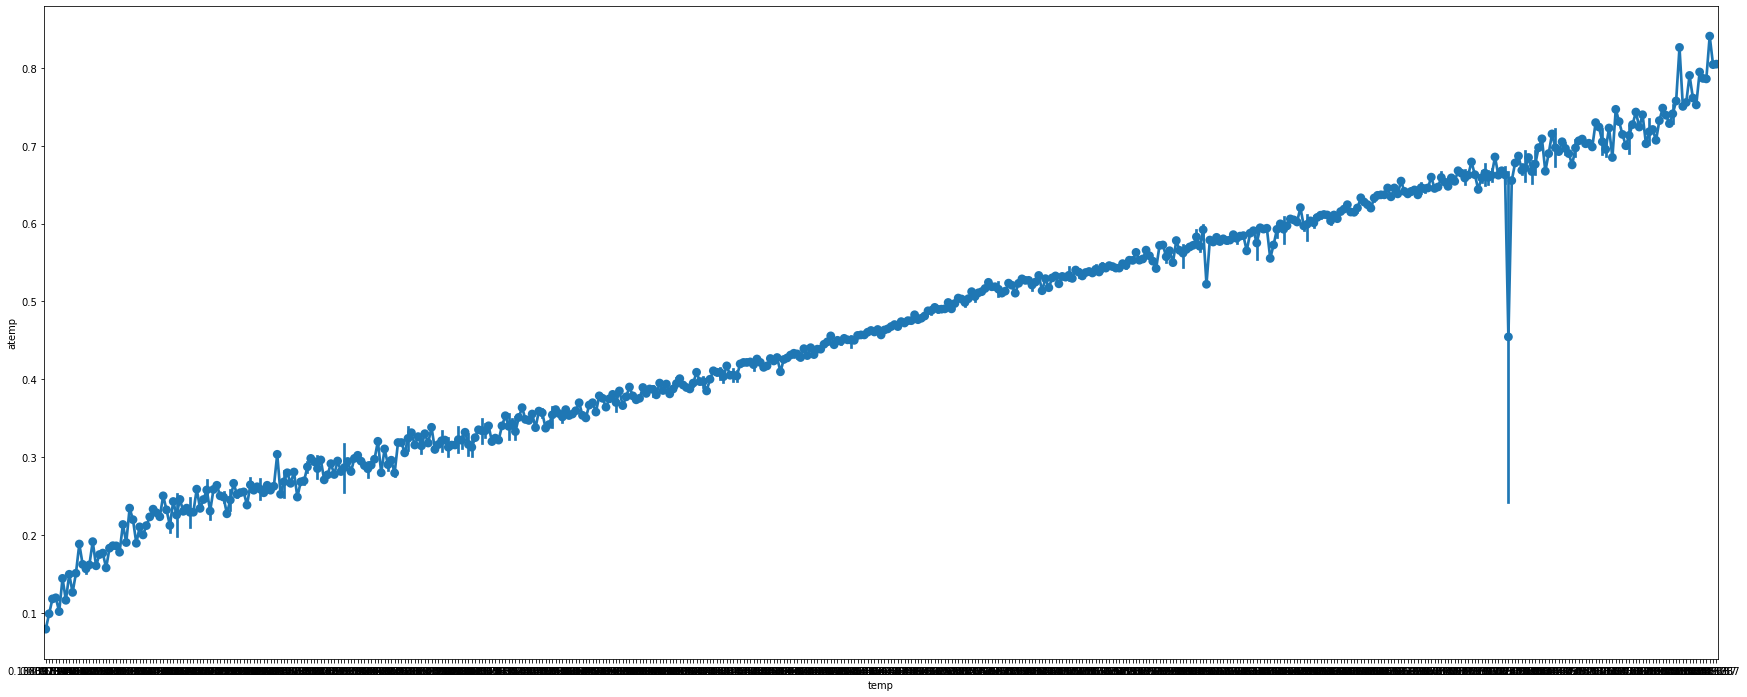

In [37]:
# Multivariate Analysis: Temp/ATemp

sns.pointplot(x=day['temp'], y=day['atemp'])
fig = plt.gcf()
fig.set_size_inches(30,12);

In [38]:
# R Squared: Temp & ATemp

_, _, r_value, _, _ = stats.linregress(day['temp'], day['atemp'])
r_square = r_value ** 2
r_square.round(2)

0.98

#### As we see above, the R Squared for "temp" and "atemp" relationship is 0.98 which is super high! -> So we should drop one of them. We decided to drop "atemp".

In [39]:
# Dropping "Atemp"

day = day.drop(labels='atemp', axis=1)
day.head()

dteday season  yr  mnth holiday weekday workingday weathersit      temp  \
0 2011-01-01      1   0     1       0       6          0          2  0.344167   
1 2011-01-02      1   0     1       0       0          0          2  0.363478   
2 2011-01-03      1   0     1       0       1          1          1  0.196364   
3 2011-01-04      1   0     1       0       2          1          1  0.200000   
4 2011-01-05      1   0     1       0       3          1          1  0.226957   

        hum  windspeed  casual  registered   cnt  year  month  
0  0.805833   0.160446     331         654   985  2011      1  
1  0.696087   0.248539     131         670   801  2011      1  
2  0.437273   0.248309     120        1229  1349  2011      1  
3  0.590435   0.160296     108        1454  1562  2011      1  
4  0.436957   0.186900      82        1518  1600  2011      1

In [40]:
null_columns=day.columns[day.isnull().any()]
day[null_columns].isnull().sum()

Series([], dtype: float64)

In [41]:
day.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
month         0
dtype: int64

In [42]:
%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('paper')

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"

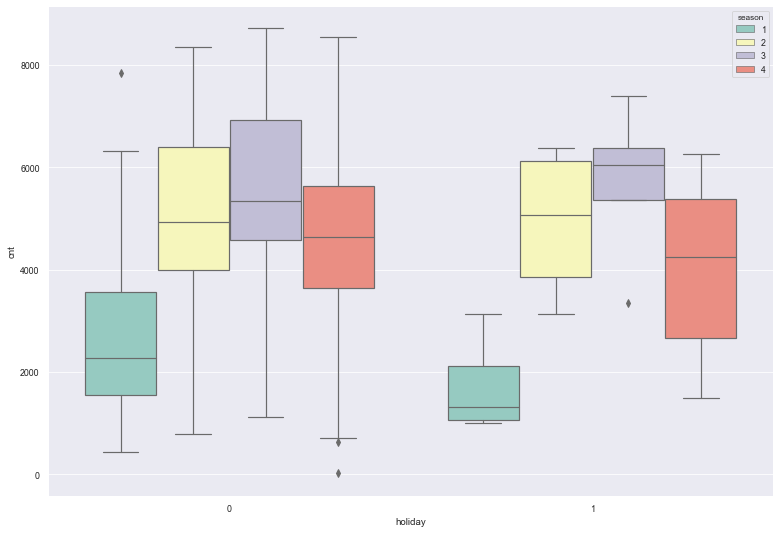

In [43]:
# Checking the Holidays bike usage by Season and Month in a Box Plot
# season=1 [Winter]

plt.subplots(figsize=(13,9))
sns.boxplot(x='holiday',hue='season', y='cnt',data=day, palette="Set3")

In [44]:
# Season Distribution of Total Bike Users

fig = go.Figure()
fig.add_trace(go.Histogram(x = day[day['season'] == 1]["cnt"],marker_color="blue",name="Winter"))
fig.add_trace(go.Histogram(x = day[day['season'] == 2]["cnt"],marker_color="green",name="Spring"))
fig.add_trace(go.Histogram(x = day[day['season'] == 3]["cnt"],marker_color="red",name="Summer"))
fig.add_trace(go.Histogram(x = day[day['season'] == 4]["cnt"],marker_color="orange",name="Fall"))


# Overlay both histograms
fig.update_layout(barmode='overlay')

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.update_layout(title="Season Distribution of Total Bike Users",xaxis_title="Usage Count",yaxis_title="Counts")
fig.show()

In [45]:
# Season Distribution of Registered Bike Users

fig = go.Figure()
fig.add_trace(go.Histogram(x = day[day['season'] == 1]["registered"],marker_color="blue",name="Winter"))
fig.add_trace(go.Histogram(x = day[day['season'] == 2]["registered"],marker_color="green",name="Spring"))
fig.add_trace(go.Histogram(x = day[day['season'] == 3]["registered"],marker_color="red",name="Summer"))
fig.add_trace(go.Histogram(x = day[day['season'] == 4]["registered"],marker_color="orange",name="Fall"))


# Overlay both histograms
fig.update_layout(barmode='overlay')

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.update_layout(title="Season Distribution of Registered Bike Users",xaxis_title="Usage Count",yaxis_title="Counts")
fig.show()

In [46]:
# Season Distribution of Casual Bike Users

fig = go.Figure()
fig.add_trace(go.Histogram(x = day[day['season'] == 1]["casual"],marker_color="blue",name="Winter"))
fig.add_trace(go.Histogram(x = day[day['season'] == 2]["casual"],marker_color="green",name="Spring"))
fig.add_trace(go.Histogram(x = day[day['season'] == 3]["casual"],marker_color="red",name="Summer"))
fig.add_trace(go.Histogram(x = day[day['season'] == 4]["casual"],marker_color="orange",name="Fall"))


# Overlay both histograms
fig.update_layout(barmode='overlay')

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.update_layout(title="Season Distribution of Casual Bike Users",xaxis_title="Usage Count",yaxis_title="Counts")
fig.show()

In [47]:
# Feeling Temp Distribution

fig = go.Figure()
fig.add_trace(go.Histogram(x = day[day['season'] == 1]["temp"],marker_color="blue",name="Winter"))
fig.add_trace(go.Histogram(x = day[day['season'] == 2]["temp"],marker_color="green",name="Spring"))
fig.add_trace(go.Histogram(x = day[day['season'] == 3]["temp"],marker_color="red",name="Summer"))
fig.add_trace(go.Histogram(x = day[day['season'] == 4]["temp"],marker_color="orange",name="Fall"))

# Overlay both histograms
fig.update_layout(barmode='overlay')

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.update_layout(title="Season Distribution of Feeling Temprature",xaxis_title="Percentage",yaxis_title="Counts")
fig.show()

- **In non-holiday time,** we observe a higher bike usage in Summer.
- **In holiday time,** we observe that Spring and Summer have the highest bike usage.

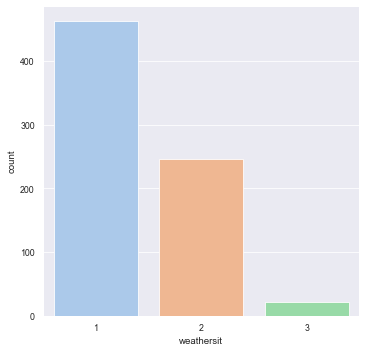

In [48]:
# Factor Plot for the Weather:
# 1-> spring, 2-> summer, 3-> fall, 4-> winter

sns.factorplot(x='weathersit',data=day,kind='count',size=5,aspect=1)

In [49]:
# just to visualize them all together again:

sns.boxplot(data=day[['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
fig=plt.gcf()
fig.set_size_inches(15,10)

### So we have visualized the data to a greater extent. Now, lets build some models and see how close we can predict the results:

In [50]:
#classifiaction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification


In [51]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   hum         731 non-null    float64       
 10  windspeed   731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
 14  year        731 non-null    int64         
 15  month       731 non-null    int64         
dtypes: category(5), datetime64

In [52]:
# Dropping for the sake of this modeling process

day = day.drop(labels='dteday', axis=1)
day.head()

season  yr  mnth holiday weekday workingday weathersit      temp       hum  \
0      1   0     1       0       6          0          2  0.344167  0.805833   
1      1   0     1       0       0          0          2  0.363478  0.696087   
2      1   0     1       0       1          1          1  0.196364  0.437273   
3      1   0     1       0       2          1          1  0.200000  0.590435   
4      1   0     1       0       3          1          1  0.226957  0.436957   

   windspeed  casual  registered   cnt  year  month  
0   0.160446     331         654   985  2011      1  
1   0.248539     131         670   801  2011      1  
2   0.248309     120        1229  1349  2011      1  
3   0.160296     108        1454  1562  2011      1  
4   0.186900      82        1518  1600  2011      1

In [53]:
x_train,x_test,y_train,y_test=train_test_split(day.drop('cnt',axis=1),day['cnt'],test_size=0.25,random_state=42)

In [54]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.23677919304419975,
  0.3018964251674624,
  0.22779965049368467,
  0.6702137882354814,
  0.23510650568487865]}

In [55]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

Modelling Algo     RMSLE
0  RandomForestRegressor  0.236779
1      AdaBoostRegressor  0.301896
2       BaggingRegressor  0.227800
3                    SVR  0.670214
4    KNeighborsRegressor  0.235107

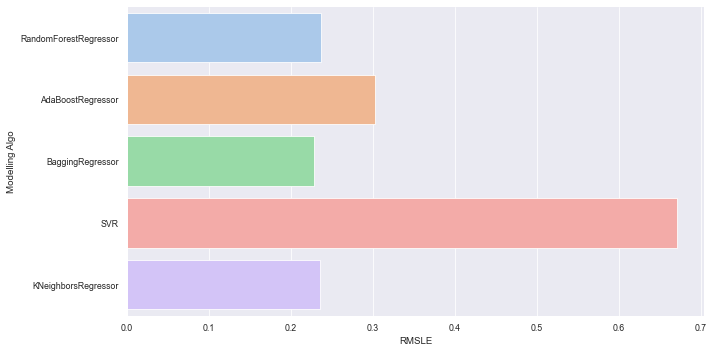

In [56]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

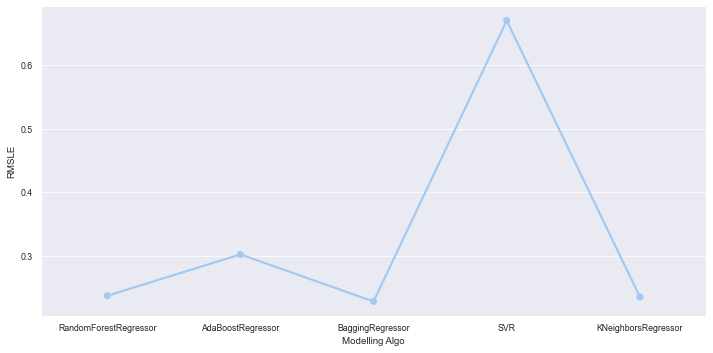

In [57]:
sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)

In [58]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.23563823211654533


In [59]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

In [60]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.23510650568487865


In [61]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 5}

> ## Conclussion 
 The Random Forest Regressor gives us the least RMSE, hence we use this to make predictions for the future bike renting demand.

# ******************
# Hour Dataset
# ******************

In [62]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [63]:
hour.drop(["instant"], axis = 1, inplace = True)

In [64]:
hour.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  
0  0.24  0.2879  0.81        0.0       3          13   16  
1  0.22  0.2727  0.80        0.0       8          32   40  
2  0.22  0.2727  0.80        0.0       5          27   32  
3  0.24  0.2879  0.75        0.0       3          10   13  
4  0.24  0.2879  0.75        0.0       0           1    1

In [65]:
hour.shape

(17379, 16)

In [66]:
hour.describe()

season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.171850   
min        0.000000      0.000000      1.000000      0.020000      0.000000   
25%        1.000000      0.000000      1.000000      0.340000      0.333300   
50%        3.000000      1.000000      1.000000      0.500000      0.484800   
75%        5.000000      1.000000      2.000000      0.660000      0.621200   
max        6.000000      1.000000      4.000000      1.000000      1.000000   

                hum     windspeed        casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  
mean       0.627229      0.190098     35.676218    153.786869    189.463088  
std        0.192930      0.122340     49.305030    151.357286    181.387599  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.480000      0.104500      4.000000     34.000000     40.000000  
50%        0.630000      0.194000     17.000000    115.000000    142.000000  
75%        0.780000      0.253700     48.000000    220.000000    281.000000  
max        1.000000      0.850700    367.000000    886.000000    977.000000

In [67]:
# Getting rid of duplicates

hour = hour.drop_duplicates()
hour.duplicated().sum()

0

In [68]:
# What are our headers in the dataset?

header_hour = hour.dtypes.index
print(header_hour)

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [69]:
# weather
hour.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [70]:
# Plotting Weather
# 1-> spring, 2-> summer, 3-> fall, 4-> winter

sns.factorplot(x='weathersit',data=hour,kind='count',size=5,aspect=1)  

In [71]:
# To visualize all together

sns.boxplot(data=hour[['temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
fig=plt.gcf()
fig.set_size_inches(10,10)

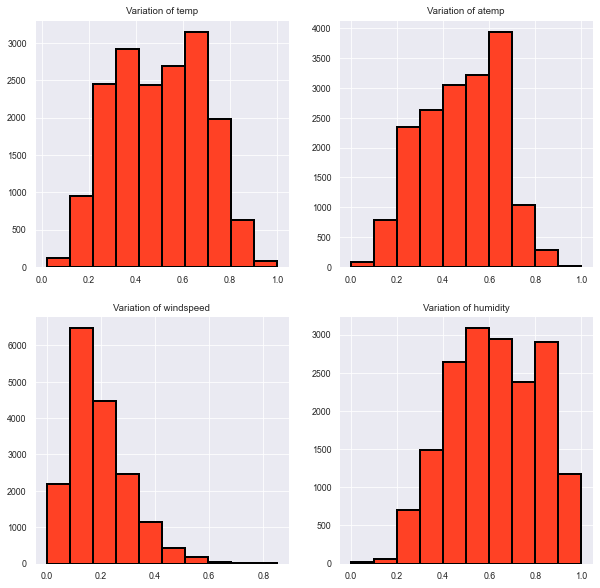

In [72]:
# Visulaizing though histograms for all the continuous variables

hour.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=hour,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=hour,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=hour,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=hour,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

#### Now, let's look at the correlaton:

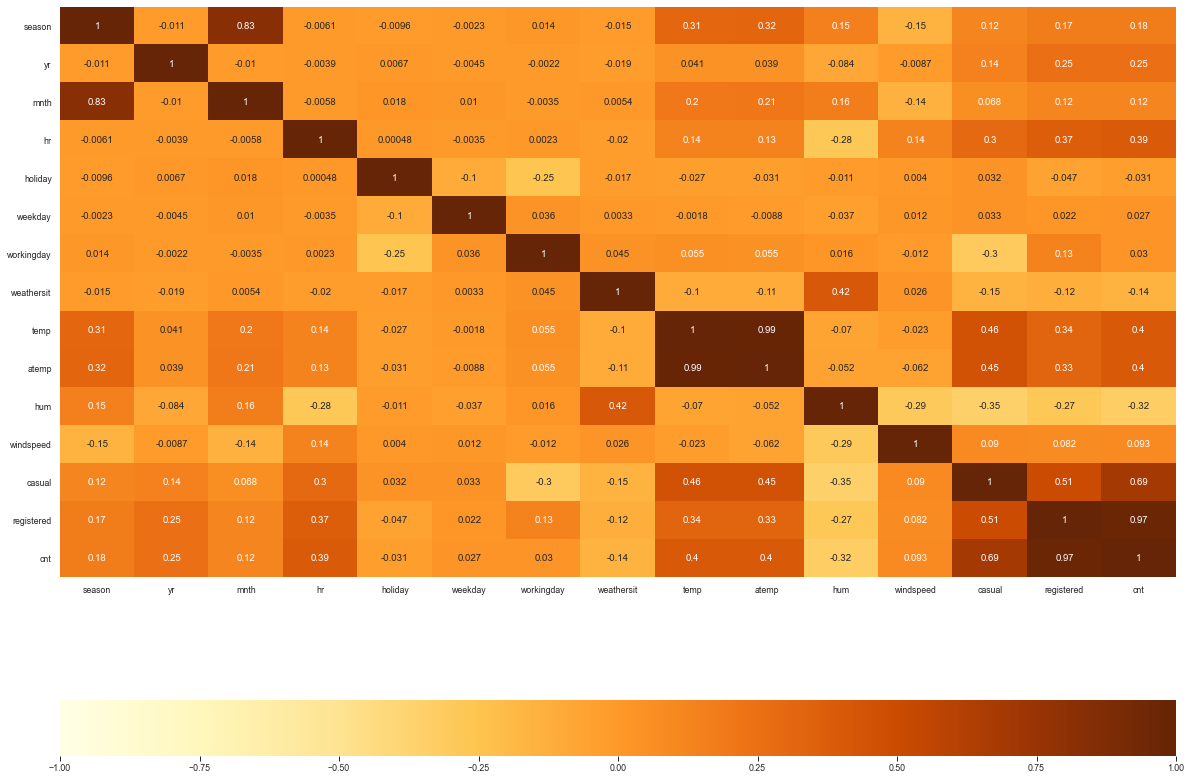

In [73]:
# Correlation
plt.subplots(figsize=(20,15))
sns.heatmap(hour.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'YlOrBr', cbar_kws= {'orientation': 'horizontal'})

### Feature Engineering

In order to get new features ans get rid of useless features.

In [74]:
# Feature Engineering: Season
# Seperating season as per values because this will enhance features in modeling phase

season=pd.get_dummies(hour['season'],prefix='season')
hour=pd.concat([hour,season],axis=1)
hour.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  season_1  season_2  \
0  0.24  0.2879  0.81        0.0       3          13   16         1         0   
1  0.22  0.2727  0.80        0.0       8          32   40         1         0   
2  0.22  0.2727  0.80        0.0       5          27   32         1         0   
3  0.24  0.2879  0.75        0.0       3          10   13         1         0   
4  0.24  0.2879  0.75        0.0       0           1    1         1         0   

   season_3  season_4  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0

In [75]:
hour = hour.drop(labels='season_4', axis=1)
hour.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  season_1  season_2  \
0  0.24  0.2879  0.81        0.0       3          13   16         1         0   
1  0.22  0.2727  0.80        0.0       8          32   40         1         0   
2  0.22  0.2727  0.80        0.0       5          27   32         1         0   
3  0.24  0.2879  0.75        0.0       3          10   13         1         0   
4  0.24  0.2879  0.75        0.0       0           1    1         1         0   

   season_3  
0         0  
1         0  
2         0  
3         0  
4         0

In [76]:
# Feature Engineering: Weather

weathersit=pd.get_dummies(hour['weathersit'],prefix='weathersit')
hour=pd.concat([hour,weathersit],axis=1)
hour.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  season_1  season_2  \
0  0.24  0.2879  0.81        0.0       3          13   16         1         0   
1  0.22  0.2727  0.80        0.0       8          32   40         1         0   
2  0.22  0.2727  0.80        0.0       5          27   32         1         0   
3  0.24  0.2879  0.75        0.0       3          10   13         1         0   
4  0.24  0.2879  0.75        0.0       0           1    1         1         0   

   season_3  weathersit_1  weathersit_2  weathersit_3  weathersit_4  
0         0             1             0             0             0  
1         0             1             0             0             0  
2         0             1             0             0             0  
3         0             1             0             0             0  
4         0             1             0             0             0

In [77]:
hour = hour.drop(labels='weathersit_4', axis=1)
hour.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  season_1  season_2  \
0  0.24  0.2879  0.81        0.0       3          13   16         1         0   
1  0.22  0.2727  0.80        0.0       8          32   40         1         0   
2  0.22  0.2727  0.80        0.0       5          27   32         1         0   
3  0.24  0.2879  0.75        0.0       3          10   13         1         0   
4  0.24  0.2879  0.75        0.0       0           1    1         1         0   

   season_3  weathersit_1  weathersit_2  weathersit_3  
0         0             1             0             0  
1         0             1             0             0  
2         0             1             0             0  
3         0             1             0             0  
4         0             1             0             0

In [78]:
# Now, we can drop weathersit and season

hour.drop(['season','weathersit'],inplace=True,axis=1)
hour.head()

dteday  yr  mnth  hr  holiday  weekday  workingday  temp   atemp   hum  \
0  2011-01-01   0     1   0        0        6           0  0.24  0.2879  0.81   
1  2011-01-01   0     1   1        0        6           0  0.22  0.2727  0.80   
2  2011-01-01   0     1   2        0        6           0  0.22  0.2727  0.80   
3  2011-01-01   0     1   3        0        6           0  0.24  0.2879  0.75   
4  2011-01-01   0     1   4        0        6           0  0.24  0.2879  0.75   

   windspeed  casual  registered  cnt  season_1  season_2  season_3  \
0        0.0       3          13   16         1         0         0   
1        0.0       8          32   40         1         0         0   
2        0.0       5          27   32         1         0         0   
3        0.0       3          10   13         1         0         0   
4        0.0       0           1    1         1         0         0   

   weathersit_1  weathersit_2  weathersit_3  
0             1             0             0  
1             1             0             0  
2             1             0             0  
3             1             0             0  
4             1             0             0

In [79]:
# Now, let's split the "dteday" feature into "year", "month", and "day"

hour['day'] = [t.dayofweek for t in pd.DatetimeIndex(hour.dteday)]
hour['month'] = [t.month for t in pd.DatetimeIndex(hour.dteday)]
hour['year'] = [t.year for t in pd.DatetimeIndex(hour.dteday)]
hour['year'] = hour['year'].map({2011:0, 2012:1})
hour.head()

dteday  yr  mnth  hr  holiday  weekday  workingday  temp   atemp   hum  \
0  2011-01-01   0     1   0        0        6           0  0.24  0.2879  0.81   
1  2011-01-01   0     1   1        0        6           0  0.22  0.2727  0.80   
2  2011-01-01   0     1   2        0        6           0  0.22  0.2727  0.80   
3  2011-01-01   0     1   3        0        6           0  0.24  0.2879  0.75   
4  2011-01-01   0     1   4        0        6           0  0.24  0.2879  0.75   

   windspeed  casual  registered  cnt  season_1  season_2  season_3  \
0        0.0       3          13   16         1         0         0   
1        0.0       8          32   40         1         0         0   
2        0.0       5          27   32         1         0         0   
3        0.0       3          10   13         1         0         0   
4        0.0       0           1    1         1         0         0   

   weathersit_1  weathersit_2  weathersit_3  day  month  year  
0             1             0             0    5      1     0  
1             1             0             0    5      1     0  
2             1             0             0    5      1     0  
3             1             0             0    5      1     0  
4             1             0             0    5      1     0

In [80]:
# Now, let's drop the extra columns

hour.drop(['dteday','yr', 'mnth'],inplace=True,axis=1)
hour.head()

hr  holiday  weekday  workingday  temp   atemp   hum  windspeed  casual  \
0   0        0        6           0  0.24  0.2879  0.81        0.0       3   
1   1        0        6           0  0.22  0.2727  0.80        0.0       8   
2   2        0        6           0  0.22  0.2727  0.80        0.0       5   
3   3        0        6           0  0.24  0.2879  0.75        0.0       3   
4   4        0        6           0  0.24  0.2879  0.75        0.0       0   

   registered  cnt  season_1  season_2  season_3  weathersit_1  weathersit_2  \
0          13   16         1         0         0             1             0   
1          32   40         1         0         0             1             0   
2          27   32         1         0         0             1             0   
3          10   13         1         0         0             1             0   
4           1    1         1         0         0             1             0   

   weathersit_3  day  month  year  
0             0    5      1     0  
1             0    5      1     0  
2             0    5      1     0  
3             0    5      1     0  
4             0    5      1     0

### Now, let's look at the correlation heatmap matrix again, with new features we created:

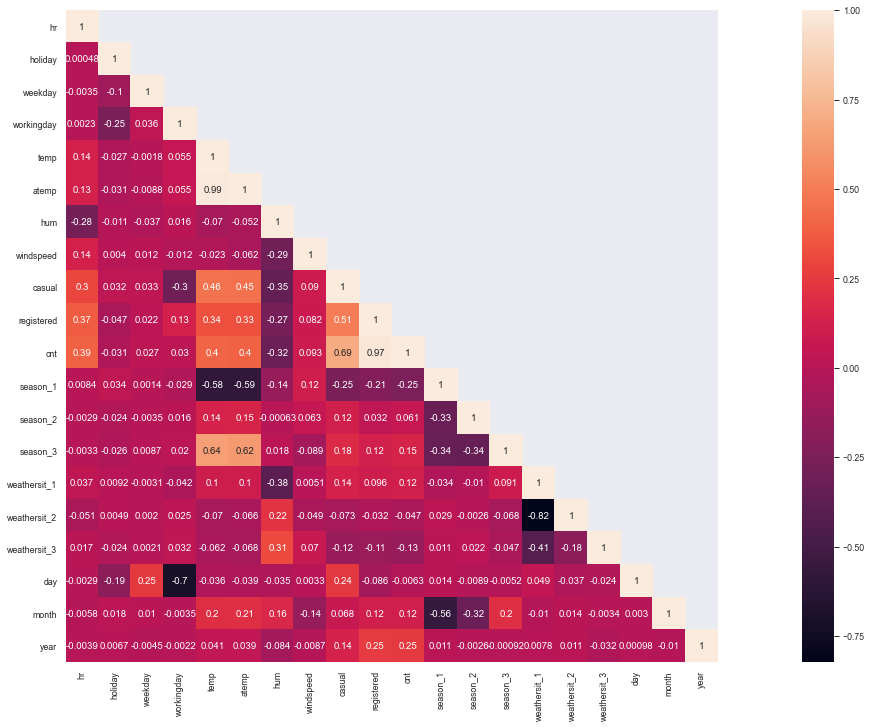

In [81]:
cor_mat= hour[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [82]:
# Let's drop "casual" and "registered" for the sake of the modeling

hour.drop(['casual','registered'],axis=1,inplace=True)
hour.head()

hr  holiday  weekday  workingday  temp   atemp   hum  windspeed  cnt  \
0   0        0        6           0  0.24  0.2879  0.81        0.0   16   
1   1        0        6           0  0.22  0.2727  0.80        0.0   40   
2   2        0        6           0  0.22  0.2727  0.80        0.0   32   
3   3        0        6           0  0.24  0.2879  0.75        0.0   13   
4   4        0        6           0  0.24  0.2879  0.75        0.0    1   

   season_1  season_2  season_3  weathersit_1  weathersit_2  weathersit_3  \
0         1         0         0             1             0             0   
1         1         0         0             1             0             0   
2         1         0         0             1             0             0   
3         1         0         0             1             0             0   
4         1         0         0             1             0             0   

   day  month  year  
0    5      1     0  
1    5      1     0  
2    5      1     0  
3    5      1     0  
4    5      1     0

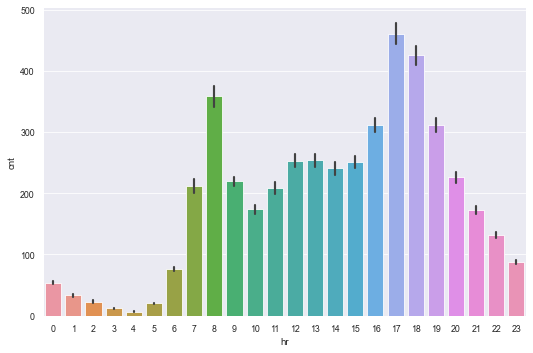

In [83]:
# Let's look at count variation with hour

sns.factorplot(x="hr",y="cnt",data=hour,kind='bar',size=5,aspect=1.5)

#### We see that the count of bike rental gets at its highest at rush hours: 7-9AM & 4-8PM

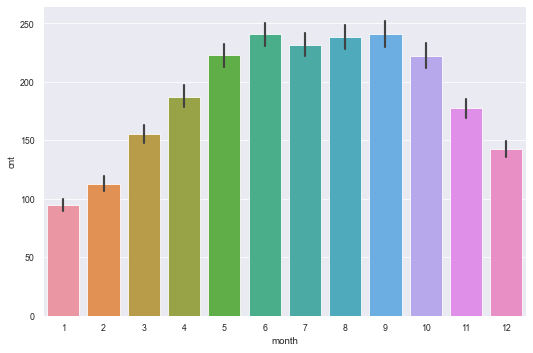

In [84]:
# month affects season and that affects wheteher people take bike or not

sns.factorplot(x="month",y="cnt",data=hour,kind='bar',size=5,aspect=1.5)

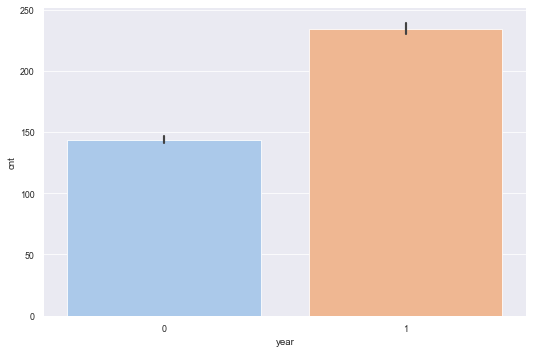

In [85]:
# demand has increased over the years
# 0 for 2011 and 1 for 2012

sns.factorplot(x="year",y="cnt",data=hour,kind='bar',size=5,aspect=1.5)

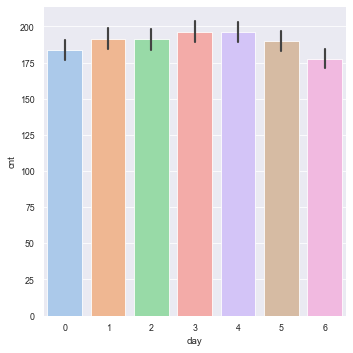

In [86]:
# day

sns.factorplot(x="day",y='cnt',kind='bar',data=hour,size=5,aspect=1)

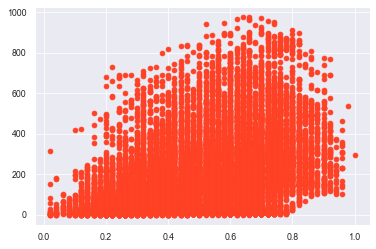

In [87]:
# temperature 

plt.scatter(x="temp",y="cnt",data=hour,color='#ff4125')

### Let's start the modeling now:

In [88]:
# Let's drop last minute useless features

hour.drop(['windspeed','atemp'],axis=1,inplace=True)
hour.head()

hr  holiday  weekday  workingday  temp   hum  cnt  season_1  season_2  \
0   0        0        6           0  0.24  0.81   16         1         0   
1   1        0        6           0  0.22  0.80   40         1         0   
2   2        0        6           0  0.22  0.80   32         1         0   
3   3        0        6           0  0.24  0.75   13         1         0   
4   4        0        6           0  0.24  0.75    1         1         0   

   season_3  weathersit_1  weathersit_2  weathersit_3  day  month  year  
0         0             1             0             0    5      1     0  
1         0             1             0             0    5      1     0  
2         0             1             0             0    5      1     0  
3         0             1             0             0    5      1     0  
4         0             1             0             0    5      1     0

In [89]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hr            17379 non-null  int64  
 1   holiday       17379 non-null  int64  
 2   weekday       17379 non-null  int64  
 3   workingday    17379 non-null  int64  
 4   temp          17379 non-null  float64
 5   hum           17379 non-null  float64
 6   cnt           17379 non-null  int64  
 7   season_1      17379 non-null  uint8  
 8   season_2      17379 non-null  uint8  
 9   season_3      17379 non-null  uint8  
 10  weathersit_1  17379 non-null  uint8  
 11  weathersit_2  17379 non-null  uint8  
 12  weathersit_3  17379 non-null  uint8  
 13  day           17379 non-null  int64  
 14  month         17379 non-null  int64  
 15  year          17379 non-null  int64  
dtypes: float64(2), int64(8), uint8(6)
memory usage: 2.2 MB


In [90]:
#categoryVariableList = ['season_1','season_2','season_3','weathersit_1','weathersit_2', 'weathersit_3', 'workingday', 'weekday', 'holiday']
#for var in categoryVariableList:
    #hour[var] = hour[var].astype("int")

In [91]:
#hour.info()

In [92]:
#hour.columns.to_series().groupby(hour.dtypes).groups

In [93]:
# To filter out any negative value in the dataset

#hour = hour[(hour['hr']>0) & (hour['temp']>0) & (hour['hum']>0)]

In [94]:
#Seperating Dataset as Responce and Features Variables

X = hour.drop('cnt', axis=1)
y = hour['cnt']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
#for random forest regresion

no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(X_train,y_train)
pred=clf_rf.predict(X_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.34212997721719873


In [97]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

In [98]:
# for KNN

n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(X_train,y_train)
pred=clf_knn.predict(X_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.42244124891565993


In [99]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 5}

#### The Random Forest Regressor gives us the least RMSE, hence we will use that to predict the bike renting model in the future.